In [95]:
from corr_estymatory import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sn
import sqlite3
from acorr_estym import *
import numpy as np
import matplotlib.pyplot as plt

### grupa rozpoznania 1

In [96]:
connection = sqlite3.connect("data/data/wea_nfz.db")
df = pd.read_sql("SELECT * FROM cva_cases \
INNER JOIN lok_gmin ON \
substr(cva_cases.teryt_code,1,7) = lok_gmin.teryt \
INNER JOIN nn_stacje ON lok_gmin.rowid - 1 = nn_stacje.id_gmi \
INNER JOIN stacje ON nn_stacje.id_st1 = stacje.id_st \
INNER JOIN pog_dzienna ON stacje.kod_st = pog_dzienna.kod_st \
AND cva_cases.adm_date = substr(pog_dzienna.pog_timestamp,1,10) \
INNER JOIN pog_dzienna_mala ON stacje.kod_st = pog_dzienna_mala.kod_st \
AND cva_cases.adm_date = substr(pog_dzienna_mala.pog_timestamp,1,10) \
WHERE (cva_cases.teryt_code LIKE '02%' AND dgn_group = 1);" , con=connection)

In [97]:
df

,index,adm_date,dgn_group,teryt_code,cva_count,cva_weekly,week,year,cva_filled,cva_filled_weekly,...,sp_wlgs,srednia_dobowe_cisnienie_na_poziomie_stacji,sp_ppps,sr_dob_cisnienie_na_pozimie_morza,sp_pppm,suma_opadu_dzien,sp_wodz,suma_opadu_noc,sp_wono,pog_timestamp
0,134,2018-01-01,1,0262011_1,<5,9,1,2018,2.0,9.0,...,None,989.4,None,1004.5,None,0.0,None,0.0,None,2018-01-01 00:00:00
1,169,2018-01-01,1,0264029_1,<5,16,1,2018,2.0,16.0,...,None,990.4,None,1005.1,None,0.0,None,0.0,None,2018-01-01 00:00:00
2,177,2018-01-01,1,0261011_1,<5,14,1,2018,3.0,14.0,...,None,964.2,None,1005.4,None,0.0,None,0.0,None,2018-01-01 00:00:00
3,187,2018-01-01,1,0264049_2,<5,12,1,2018,2.0,12.0,...,None,990.4,None,1005.1,None,0.0,None,0.0,None,2018-01-01 00:00:00
4,338,2018-01-01,1,0208021_1,<5,8,1,2018,1.0,8.0,...,None,964.0,None,1007.2,None,0.0,None,0.0,None,2018-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,405301,2019-12-27,1,0264049_2,<5,<5,51,2019,1.0,2.0,...,None,1011.0,None,1026.2,None,0.0,None,0.1,None,2019-12-27 00:00:00
2904,405303,2019-12-27,1,0208021_1,<5,5,51,2019,2.0,5.0,...,None,982.0,None,1026.7,None,0.4,None,0.8,None,2019-12-27 00:00:00
2905,405349,2019-12-27,1,0262011_1,<5,8,51,2019,2.0,8.0,...,None,1011.1,None,1026.9,None,0.0,None,0.0,None,2019-12-27 00:00:00
2906,405426,2019-12-28,1,0262011_1,<5,8,51,2019,2.0,8.0,...,None,1022.6,None,1038.7,None,0.0,None,0.0,None,2019-12-28 00:00:00


In [98]:
df2_adm_date = []
df2_cva_filled = []
df2_sr_dob_cisnienie_na_poziomie_stacji = []
i = 0
while i < len(df) - 1:
    j = i
    while df.adm_date[i] == df.adm_date[i + 1]:
        i += 1
    df2_adm_date.append(df.adm_date[i])
    df2_cva_filled.append(sum(df.cva_filled[j:i+1]))
    df2_sr_dob_cisnienie_na_poziomie_stacji.append(df.srednia_dobowe_cisnienie_na_poziomie_stacji[i])
    i += 1

In [99]:
df2 = pd.DataFrame({"adm_date": df2_adm_date, "cva_filled": df2_cva_filled, "srednia_dobowe_cisnienie_na_poziomie_stacji": df2_sr_dob_cisnienie_na_poziomie_stacji})
df2

,adm_date,cva_filled,srednia_dobowe_cisnienie_na_poziomie_stacji
0,2018-01-01,10.0,964.0
1,2018-01-02,12.0,966.1
2,2018-01-03,9.0,956.7
3,2018-01-04,7.0,982.9
4,2018-01-05,6.0,984.6
...,...,...,...
722,2019-12-24,5.0,968.9
723,2019-12-25,6.0,969.2
724,2019-12-26,3.0,980.6
725,2019-12-27,8.0,1011.1


In [100]:
cisn = list(df2.srednia_dobowe_cisnienie_na_poziomie_stacji.values)
cva = list(df2.cva_filled.values)

In [101]:
cross_corr = auto2corr4(cisn, cva, [-5, 5])
cross_corr
# fig = plt.figure(figsize=(20, 8))
# plt.

[0.40601565666802464,
 0.12513933927848436,
 0.5294005119068609,
 0.22886533378315538,
 -0.43200876570732405,
 1.0,
 0.4796881333603638,
 -0.30768646128899607,
 -0.10969168017834457,
 0.3645748885285855,
 0.4612700141872804]

In [102]:
pea = auto2cov(cisn, cva, [-5, 5])
cross_corr = auto2corr(cisn, cva, [-5, 5])
cross_corr1 = auto2corr1(cisn, cva, [-5, 5], 2.2191)
#cross_corr2 = auto2corr2(cisn, cva, [-5, 5], 0.015)
cross_corr3 = auto2corr3(cisn, cva, [-5, 5])
cross_corr4 = auto2corr4(cisn, cva, [-5, 5])
cross_corr5 = auto2corr5(cisn, cva, [-5, 5])
cross_corr6 = auto2corr6(cisn, cva, [-5, 5])
cross_corr8 = auto2corr8(cisn, cva, [-5, 5])
cross_corr9 = auto2corr9(cisn, cva, [-5, 5])
cross_corr10 = auto2corr10(cisn, cva, [-5, 5])

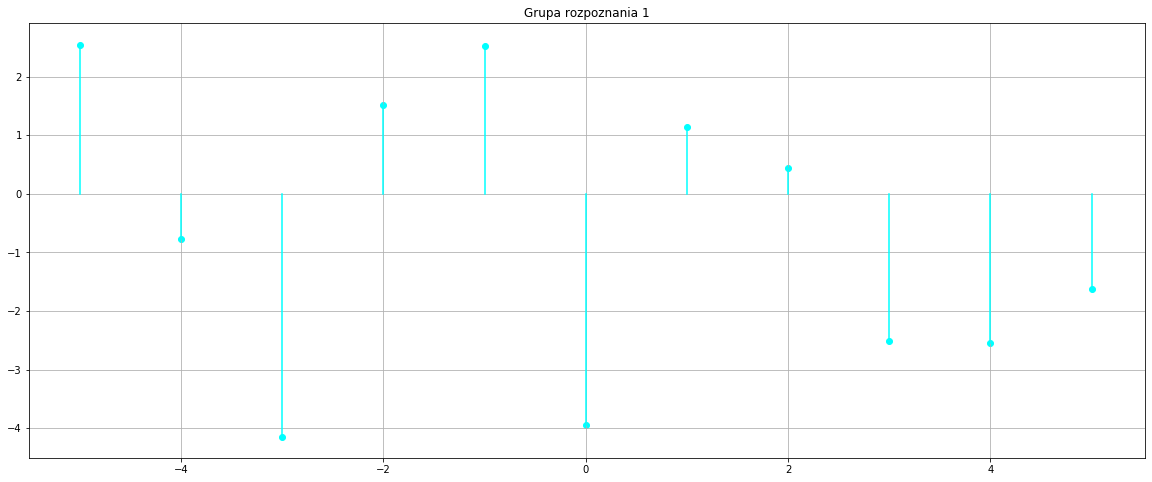

In [103]:
fig = plt.figure(figsize=(20, 8))
for i in range(len(cross_corr)):
    plt.scatter(i-5, pea[i], c='cyan')
    plt.plot([i-5, i-5], [0, pea[i]], 'cyan')
    
#     plt.scatter(i-5, cross_corr[i], c='green')
#     plt.scatter(i-5, cross_corr1[i], c='red')
#     #plt.scatter(i-5, cross_corr2[i], c='olive')
#     plt.scatter(i-5, cross_corr3[i], c='blue')
#     plt.scatter(i-5, cross_corr4[i], c='orange')
#     plt.scatter(i-5, cross_corr5[i], c='purple')
#     plt.scatter(i-5, cross_corr6[i], c='brown')
#     plt.scatter(i-5, cross_corr8[i], c='pink')
#     plt.scatter(i-5, cross_corr9[i], c='gray')
#     plt.scatter(i-5, cross_corr10[i], c='black')
    
#     plt.plot([i-5, i-5], [0, cross_corr[i]], 'g')
#     plt.plot([i-5, i-5], [0, cross_corr1[i]], 'r')
#     #plt.plot([i-5, i-5], [0, cross_corr2[i]], 'olive')
#     plt.plot([i-5, i-5], [0, cross_corr3[i]], 'b')
#     plt.plot([i-5, i-5], [0, cross_corr4[i]], 'orange')
#     plt.plot([i-5, i-5], [0, cross_corr5[i]], 'purple')
#     plt.plot([i-5, i-5], [0, cross_corr6[i]], 'brown')
#     plt.plot([i-5, i-5], [0, cross_corr8[i]], 'pink')
#     plt.plot([i-5, i-5], [0, cross_corr9[i]], 'gray')
#     plt.plot([i-5, i-5], [0, cross_corr10[i]], 'black')
    
    plt.grid(True)
#     plt.legend(("acorr", "acorr1" ,"acorr3","acorr4","acorr5","acorr6","acorr8","acorr9","acorr10"))
    plt.title("Grupa rozpoznania 1")

### grupa rozpoznania 2

In [ ]:
connection = sqlite3.connect("data/data/wea_nfz.db")
df = pd.read_sql("SELECT * FROM cva_cases \
INNER JOIN lok_gmin ON \
substr(cva_cases.teryt_code,1,7) = lok_gmin.teryt \
INNER JOIN nn_stacje ON lok_gmin.rowid - 1 = nn_stacje.id_gmi \
INNER JOIN stacje ON nn_stacje.id_st1 = stacje.id_st \
INNER JOIN pog_dzienna ON stacje.kod_st = pog_dzienna.kod_st \
AND cva_cases.adm_date = substr(pog_dzienna.pog_timestamp,1,10) \
INNER JOIN pog_dzienna_mala ON stacje.kod_st = pog_dzienna_mala.kod_st \
AND cva_cases.adm_date = substr(pog_dzienna_mala.pog_timestamp,1,10) \
WHERE (cva_cases.teryt_code LIKE '02%' AND dgn_group = 2);" , con=connection)

In [59]:
df2_adm_date = []
df2_cva_filled = []
df2_sr_dob_cisnienie_na_poziomie_stacji = []
i = 0
while i < len(df) - 1:
    j = i
    while df.adm_date[i] == df.adm_date[i + 1]:
        i += 1
    df2_adm_date.append(df.adm_date[i])
    df2_cva_filled.append(sum(df.cva_filled[j:i+1]))
    df2_sr_dob_cisnienie_na_poziomie_stacji.append(df.srednia_dobowe_cisnienie_na_poziomie_stacji[i])
    i += 1

KeyError: 2920

In [ ]:
df2 = pd.DataFrame({"adm_date": df2_adm_date, "cva_filled": df2_cva_filled, "srednia_dobowe_cisnienie_na_poziomie_stacji": df2_sr_dob_cisnienie_na_poziomie_stacji})
df2

In [ ]:
cisn = list(df2.srednia_dobowe_cisnienie_na_poziomie_stacji.values)
cva = list(df2.cva_filled.values)

In [ ]:
cross_corr = auto2corr(cisn, cva, [-5, 5])
cross_corr1 = auto2corr1(cisn, cva, [-5, 5], 2.2191)
#cross_corr2 = auto2corr2(cisn, cva, [-5, 5], 0.015)
cross_corr3 = auto2corr3(cisn, cva, [-5, 5])
cross_corr4 = auto2corr4(cisn, cva, [-5, 5])
cross_corr5 = auto2corr5(cisn, cva, [-5, 5])
cross_corr6 = auto2corr6(cisn, cva, [-5, 5])
cross_corr8 = auto2corr8(cisn, cva, [-5, 5])
cross_corr9 = auto2corr9(cisn, cva, [-5, 5])
cross_corr10 = auto2corr10(cisn, cva, [-5, 5])

In [ ]:
fig = plt.figure(figsize=(20, 8))
for i in range(len(cross_corr)):
    plt.scatter(i-5, cross_corr[i], c='green')
    plt.scatter(i-5, cross_corr1[i], c='red')
    #plt.scatter(i-5, cross_corr2[i], c='olive')
    plt.scatter(i-5, cross_corr3[i], c='blue')
    plt.scatter(i-5, cross_corr4[i], c='orange')
    plt.scatter(i-5, cross_corr5[i], c='purple')
    plt.scatter(i-5, cross_corr6[i], c='brown')
    plt.scatter(i-5, cross_corr8[i], c='pink')
    plt.scatter(i-5, cross_corr9[i], c='gray')
    plt.scatter(i-5, cross_corr10[i], c='black')
    
    plt.plot([i-5, i-5], [0, cross_corr[i]], 'g')
    plt.plot([i-5, i-5], [0, cross_corr1[i]], 'r')
    #plt.plot([i-5, i-5], [0, cross_corr2[i]], 'olive')
    plt.plot([i-5, i-5], [0, cross_corr3[i]], 'b')
    plt.plot([i-5, i-5], [0, cross_corr4[i]], 'orange')
    plt.plot([i-5, i-5], [0, cross_corr5[i]], 'purple')
    plt.plot([i-5, i-5], [0, cross_corr6[i]], 'brown')
    plt.plot([i-5, i-5], [0, cross_corr8[i]], 'pink')
    plt.plot([i-5, i-5], [0, cross_corr9[i]], 'gray')
    plt.plot([i-5, i-5], [0, cross_corr10[i]], 'black')
    
    plt.grid(True)
    plt.legend(("acorr", "acorr1", "acorr3","acorr4","acorr5","acorr6","acorr8","acorr9","acorr10",))
    plt.title("Grupa rozpoznania 2")

### grupa rozpoznania 3

In [63]:
df = pd.read_sql("SELECT * FROM cva_cases \
INNER JOIN lok_gmin ON \
substr(cva_cases.teryt_code,1,7) = lok_gmin.teryt \
INNER JOIN nn_stacje ON lok_gmin.rowid - 1 = nn_stacje.id_gmi \
INNER JOIN stacje ON nn_stacje.id_st1 = stacje.id_st \
INNER JOIN pog_dzienna ON stacje.kod_st = pog_dzienna.kod_st \
AND cva_cases.adm_date = substr(pog_dzienna.pog_timestamp,1,10) \
INNER JOIN pog_dzienna_mala ON stacje.kod_st = pog_dzienna_mala.kod_st \
AND cva_cases.adm_date = substr(pog_dzienna_mala.pog_timestamp,1,10) \
WHERE (cva_cases.teryt_code LIKE '02%' AND dgn_group = 3);" , con=connection)

In [64]:
df2_adm_date = []
df2_cva_filled = []
df2_sr_dob_cisnienie_na_poziomie_stacji = []
i = 0
while i < len(df) - 1:
    j = i
    while df.adm_date[i] == df.adm_date[i + 1]:
        i += 1
    df2_adm_date.append(df.adm_date[i])
    df2_cva_filled.append(sum(df.cva_filled[j:i+1]))
    df2_sr_dob_cisnienie_na_poziomie_stacji.append(df.srednia_dobowe_cisnienie_na_poziomie_stacji[i])
    i += 1

In [65]:
df2 = pd.DataFrame({"adm_date": df2_adm_date, "cva_filled": df2_cva_filled, "srednia_dobowe_cisnienie_na_poziomie_stacji": df2_sr_dob_cisnienie_na_poziomie_stacji})
df2

,adm_date,cva_filled,srednia_dobowe_cisnienie_na_poziomie_stacji
0,2018-01-01,1,989.4
1,2018-01-03,1,956.7
2,2018-01-07,1,1010.3
3,2018-01-09,1,1008.9
4,2018-01-11,1,974.9
...,...,...,...
165,2019-11-17,1,970.5
166,2019-11-21,1,998.1
167,2019-11-28,1,983.2
168,2019-12-08,1,993.3


In [66]:
cisn = list(df2.srednia_dobowe_cisnienie_na_poziomie_stacji.values)
cva = list(df2.cva_filled.values)

In [67]:
pea = auto2cov(cisn, cva, [-5, 5])
cross_corr = auto2corr(cisn, cva, [-5, 5])
cross_corr1 = auto2corr1(cisn, cva, [-5, 5], 2.2191)
#cross_corr2 = auto2corr2(cisn, cva, [-5, 5], 0.015)
cross_corr3 = auto2corr3(cisn, cva, [-5, 5])
cross_corr4 = auto2corr4(cisn, cva, [-5, 5])
cross_corr5 = auto2corr5(cisn, cva, [-5, 5])
cross_corr6 = auto2corr6(cisn, cva, [-5, 5])
cross_corr8 = auto2corr8(cisn, cva, [-5, 5])
cross_corr9 = auto2corr9(cisn, cva, [-5, 5])
cross_corr10 = auto2corr10(cisn, cva, [-5, 5])

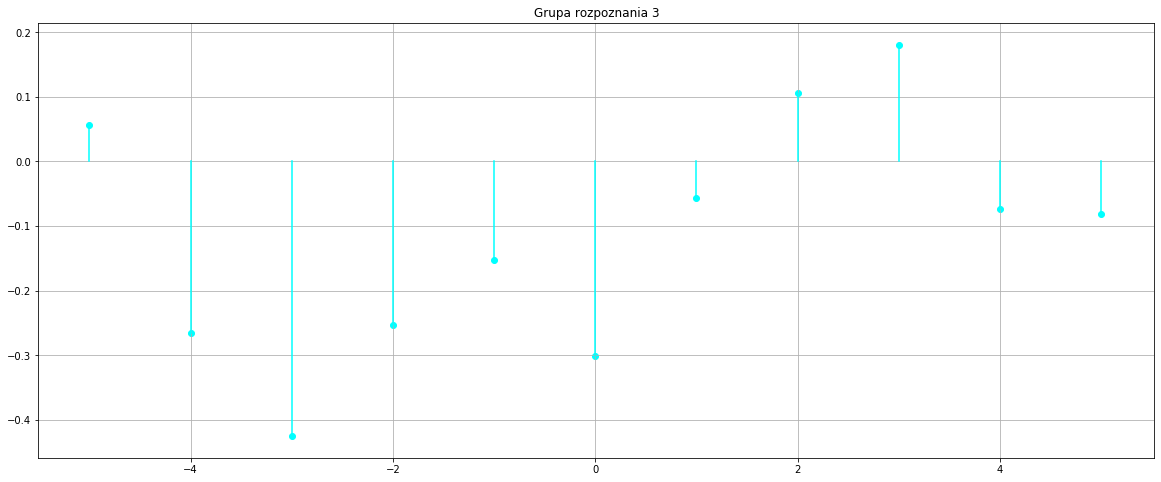

In [68]:
fig = plt.figure(figsize=(20, 8))
for i in range(len(cross_corr)):
    plt.scatter(i-5, pea[i], c='cyan')
    plt.plot([i-5, i-5], [0, pea[i]], 'cyan')
#     plt.scatter(i-5, cross_corr[i], c='green')
#     plt.scatter(i-5, cross_corr1[i], c='red')
#     #plt.scatter(i-5, cross_corr2[i], c='olive')
#     plt.scatter(i-5, cross_corr3[i], c='blue')
#     plt.scatter(i-5, cross_corr4[i], c='orange')
#     plt.scatter(i-5, cross_corr5[i], c='purple')
#     plt.scatter(i-5, cross_corr6[i], c='brown')
#     plt.scatter(i-5, cross_corr8[i], c='pink')
#     plt.scatter(i-5, cross_corr9[i], c='gray')
#     plt.scatter(i-5, cross_corr10[i], c='black')
    
#     plt.plot([i-5, i-5], [0, cross_corr[i]], 'g')
#     plt.plot([i-5, i-5], [0, cross_corr1[i]], 'r')
#     #plt.plot([i-5, i-5], [0, cross_corr2[i]], 'olive')
#     plt.plot([i-5, i-5], [0, cross_corr3[i]], 'b')
#     plt.plot([i-5, i-5], [0, cross_corr4[i]], 'orange')
#     plt.plot([i-5, i-5], [0, cross_corr5[i]], 'purple')
#     plt.plot([i-5, i-5], [0, cross_corr6[i]], 'brown')
#     plt.plot([i-5, i-5], [0, cross_corr8[i]], 'pink')
#     plt.plot([i-5, i-5], [0, cross_corr9[i]], 'gray')
#     plt.plot([i-5, i-5], [0, cross_corr10[i]], 'black')
    
    plt.grid(True)
#     plt.legend(("acorr", "acorr1", "acorr3","acorr4","acorr5","acorr6","acorr8","acorr9","acorr10",))
    plt.title("Grupa rozpoznania 3")

In [69]:
cross_corr4

[1.0956399437412299,
 1.3347398030942503,
 1.4781997187060407,
 1.0956399437412299,
 1.047819971870615,
 1.0,
 0.9043600562587701,
 0.8804500703234898,
 0.6174402250351891,
 1.0717299578059223,
 1.0956399437412299]

### grupa rozpoznania 4

In [70]:
df = pd.read_sql("SELECT * FROM cva_cases \
INNER JOIN lok_gmin ON \
substr(cva_cases.teryt_code,1,7) = lok_gmin.teryt \
INNER JOIN nn_stacje ON lok_gmin.rowid - 1 = nn_stacje.id_gmi \
INNER JOIN stacje ON nn_stacje.id_st1 = stacje.id_st \
INNER JOIN pog_dzienna ON stacje.kod_st = pog_dzienna.kod_st \
AND cva_cases.adm_date = substr(pog_dzienna.pog_timestamp,1,10) \
INNER JOIN pog_dzienna_mala ON stacje.kod_st = pog_dzienna_mala.kod_st \
AND cva_cases.adm_date = substr(pog_dzienna_mala.pog_timestamp,1,10) \
WHERE (cva_cases.teryt_code LIKE '02%' AND dgn_group = 4);" , con=connection)

In [71]:
df2_adm_date = []
df2_cva_filled = []
df2_sr_dob_cisnienie_na_poziomie_stacji = []
i = 0
while i < len(df) - 1:
    j = i
    while df.adm_date[i] == df.adm_date[i + 1]:
        i += 1
    df2_adm_date.append(df.adm_date[i])
    df2_cva_filled.append(sum(df.cva_filled[j:i+1]))
    df2_sr_dob_cisnienie_na_poziomie_stacji.append(df.srednia_dobowe_cisnienie_na_poziomie_stacji[i])
    i += 1

In [72]:
df2 = pd.DataFrame({"adm_date": df2_adm_date, "cva_filled": df2_cva_filled, "srednia_dobowe_cisnienie_na_poziomie_stacji": df2_sr_dob_cisnienie_na_poziomie_stacji})
df2

,adm_date,cva_filled,srednia_dobowe_cisnienie_na_poziomie_stacji
0,2018-01-03,1.0,956.7
1,2018-01-04,5.0,956.6
2,2018-01-05,4.0,984.6
3,2018-01-06,2.0,968.1
4,2018-01-07,1.0,1010.1
...,...,...,...
427,2019-12-15,2.0,964.6
428,2019-12-16,1.0,996.9
429,2019-12-17,2.0,995.5
430,2019-12-18,1.0,1001.3


In [73]:
cisn = list(df2.srednia_dobowe_cisnienie_na_poziomie_stacji.values)
cva = list(df2.cva_filled.values)

In [74]:
pea = auto2cov(cisn, cva, [-5, 5])
cross_corr = auto2corr(cisn, cva, [-5, 5])
cross_corr1 = auto2corr1(cisn, cva, [-5, 5], 2.2191)
#cross_corr2 = auto2corr2(cisn, cva, [-5, 5], 0.015)
cross_corr3 = auto2corr3(cisn, cva, [-5, 5])
cross_corr4 = auto2corr4(cisn, cva, [-5, 5])
cross_corr5 = auto2corr5(cisn, cva, [-5, 5])
cross_corr6 = auto2corr6(cisn, cva, [-5, 5])
cross_corr8 = auto2corr8(cisn, cva, [-5, 5])
cross_corr9 = auto2corr9(cisn, cva, [-5, 5])
cross_corr10 = auto2corr10(cisn, cva, [-5, 5])

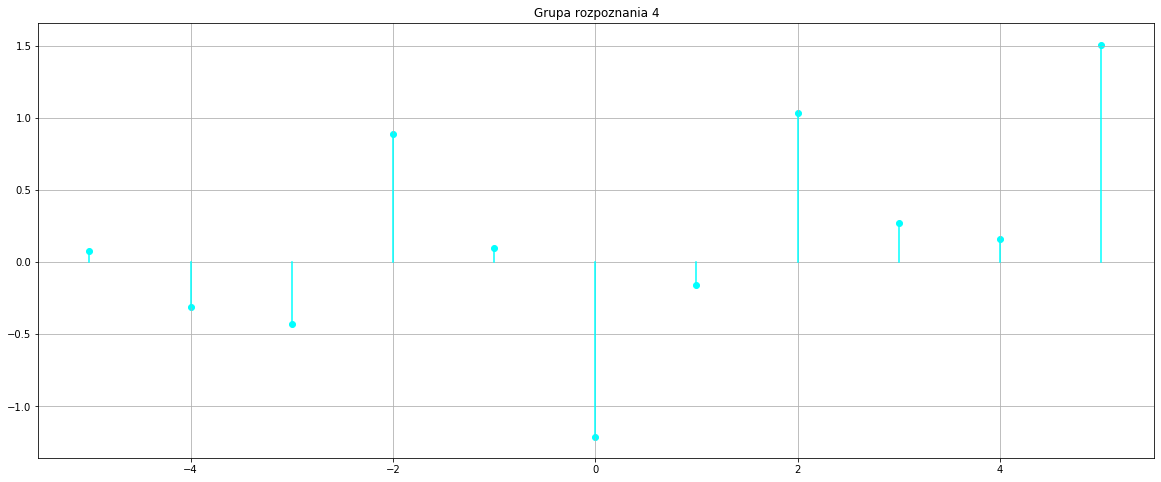

In [75]:
fig = plt.figure(figsize=(20, 8))
for i in range(len(cross_corr)):
    plt.scatter(i-5, pea[i], c='cyan')
    plt.plot([i-5, i-5], [0, pea[i]], 'cyan')
#     plt.scatter(i-5, cross_corr[i], c='green')
#     plt.scatter(i-5, cross_corr1[i], c='red')
#     #plt.scatter(i-5, cross_corr2[i], c='olive')
#     plt.scatter(i-5, cross_corr3[i], c='blue')
#     plt.scatter(i-5, cross_corr4[i], c='orange')
#     plt.scatter(i-5, cross_corr5[i], c='purple')
#     plt.scatter(i-5, cross_corr6[i], c='brown')
#     plt.scatter(i-5, cross_corr8[i], c='pink')
#     plt.scatter(i-5, cross_corr9[i], c='gray')
#     plt.scatter(i-5, cross_corr10[i], c='black')
    
#     plt.plot([i-5, i-5], [0, cross_corr[i]], 'g')
#     plt.plot([i-5, i-5], [0, cross_corr1[i]], 'r')
#     #plt.plot([i-5, i-5], [0, cross_corr2[i]], 'olive')
#     plt.plot([i-5, i-5], [0, cross_corr3[i]], 'b')
#     plt.plot([i-5, i-5], [0, cross_corr4[i]], 'orange')
#     plt.plot([i-5, i-5], [0, cross_corr5[i]], 'purple')
#     plt.plot([i-5, i-5], [0, cross_corr6[i]], 'brown')
#     plt.plot([i-5, i-5], [0, cross_corr8[i]], 'pink')
#     plt.plot([i-5, i-5], [0, cross_corr9[i]], 'gray')
#     plt.plot([i-5, i-5], [0, cross_corr10[i]], 'black')
    
    plt.grid(True)
#     plt.legend(("acorr", "acorr1", "acorr3","acorr4","acorr5","acorr6","acorr8","acorr9","acorr10",))
    plt.title("Grupa rozpoznania 4")

### grupa rozpoznania 5

In [76]:
df = pd.read_sql("SELECT * FROM cva_cases \
INNER JOIN lok_gmin ON \
substr(cva_cases.teryt_code,1,7) = lok_gmin.teryt \
INNER JOIN nn_stacje ON lok_gmin.rowid - 1 = nn_stacje.id_gmi \
INNER JOIN stacje ON nn_stacje.id_st1 = stacje.id_st \
INNER JOIN pog_dzienna ON stacje.kod_st = pog_dzienna.kod_st \
AND cva_cases.adm_date = substr(pog_dzienna.pog_timestamp,1,10) \
INNER JOIN pog_dzienna_mala ON stacje.kod_st = pog_dzienna_mala.kod_st \
AND cva_cases.adm_date = substr(pog_dzienna_mala.pog_timestamp,1,10) \
WHERE (cva_cases.teryt_code LIKE '02%' AND dgn_group = 5);" , con=connection)

In [77]:
df2_adm_date = []
df2_cva_filled = []
df2_sr_dob_cisnienie_na_poziomie_stacji = []
i = 0
while i < len(df) - 1:
    j = i
    while df.adm_date[i] == df.adm_date[i + 1]:
        i += 1
    df2_adm_date.append(df.adm_date[i])
    df2_cva_filled.append(sum(df.cva_filled[j:i+1]))
    df2_sr_dob_cisnienie_na_poziomie_stacji.append(df.srednia_dobowe_cisnienie_na_poziomie_stacji[i])
    i += 1

In [78]:
df2 = pd.DataFrame({"adm_date": df2_adm_date, "cva_filled": df2_cva_filled, "srednia_dobowe_cisnienie_na_poziomie_stacji": df2_sr_dob_cisnienie_na_poziomie_stacji})
df2

,adm_date,cva_filled,srednia_dobowe_cisnienie_na_poziomie_stacji
0,2018-01-01,6.0,964.0
1,2018-01-02,9.0,992.6
2,2018-01-03,5.0,956.7
3,2018-01-04,8.0,956.6
4,2018-01-05,5.0,958.2
...,...,...,...
721,2019-12-25,3.0,969.2
722,2019-12-26,3.0,978.6
723,2019-12-27,1.0,1011.1
724,2019-12-29,1.0,1024.7


In [79]:
cisn = list(df2.srednia_dobowe_cisnienie_na_poziomie_stacji.values)
cva = list(df2.cva_filled.values)

In [80]:
pea = auto2cov(cisn, cva, [-5, 5])
cross_corr = auto2corr(cisn, cva, [-5, 5])
cross_corr1 = auto2corr1(cisn, cva, [-5, 5], 2.2191)
#cross_corr2 = auto2corr2(cisn, cva, [-5, 5], 0.015)
cross_corr3 = auto2corr3(cisn, cva, [-5, 5])
cross_corr4 = auto2corr4(cisn, cva, [-5, 5])
cross_corr5 = auto2corr5(cisn, cva, [-5, 5])
cross_corr6 = auto2corr6(cisn, cva, [-5, 5])
cross_corr8 = auto2corr8(cisn, cva, [-5, 5])
cross_corr9 = auto2corr9(cisn, cva, [-5, 5])
cross_corr10 = auto2corr10(cisn, cva, [-5, 5])

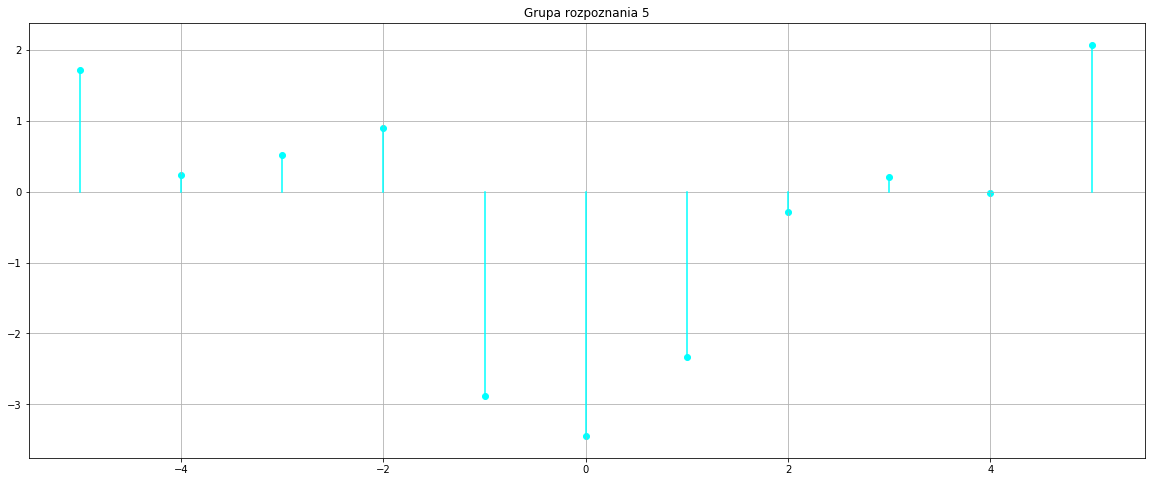

In [81]:
fig = plt.figure(figsize=(20, 8))
for i in range(len(cross_corr)):
    plt.scatter(i-5, pea[i], c='cyan')
    plt.plot([i-5, i-5], [0, pea[i]], 'cyan')
#     plt.scatter(i-5, cross_corr[i], c='green')
#     plt.scatter(i-5, cross_corr1[i], c='red')
#     #plt.scatter(i-5, cross_corr2[i], c='olive')
#     plt.scatter(i-5, cross_corr3[i], c='blue')
#     plt.scatter(i-5, cross_corr4[i], c='orange')
#     plt.scatter(i-5, cross_corr5[i], c='purple')
#     plt.scatter(i-5, cross_corr6[i], c='brown')
#     plt.scatter(i-5, cross_corr8[i], c='pink')
#     plt.scatter(i-5, cross_corr9[i], c='gray')
#     plt.scatter(i-5, cross_corr10[i], c='black')
    
#     plt.plot([i-5, i-5], [0, cross_corr[i]], 'g')
#     plt.plot([i-5, i-5], [0, cross_corr1[i]], 'r')
#     #plt.plot([i-5, i-5], [0, cross_corr2[i]], 'olive')
#     plt.plot([i-5, i-5], [0, cross_corr3[i]], 'b')
#     plt.plot([i-5, i-5], [0, cross_corr4[i]], 'orange')
#     plt.plot([i-5, i-5], [0, cross_corr5[i]], 'purple')
#     plt.plot([i-5, i-5], [0, cross_corr6[i]], 'brown')
#     plt.plot([i-5, i-5], [0, cross_corr8[i]], 'pink')
#     plt.plot([i-5, i-5], [0, cross_corr9[i]], 'gray')
#     plt.plot([i-5, i-5], [0, cross_corr10[i]], 'black')
    
    plt.grid(True)
#     plt.legend(("acorr", "acorr1", "acorr3","acorr4","acorr5","acorr6","acorr8","acorr9","acorr10",))
    plt.title("Grupa rozpoznania 5")

### grupa rozpoznania 6

In [82]:
df = pd.read_sql("SELECT * FROM cva_cases \
INNER JOIN lok_gmin ON \
substr(cva_cases.teryt_code,1,7) = lok_gmin.teryt \
INNER JOIN nn_stacje ON lok_gmin.rowid - 1 = nn_stacje.id_gmi \
INNER JOIN stacje ON nn_stacje.id_st1 = stacje.id_st \
INNER JOIN pog_dzienna ON stacje.kod_st = pog_dzienna.kod_st \
AND cva_cases.adm_date = substr(pog_dzienna.pog_timestamp,1,10) \
INNER JOIN pog_dzienna_mala ON stacje.kod_st = pog_dzienna_mala.kod_st \
AND cva_cases.adm_date = substr(pog_dzienna_mala.pog_timestamp,1,10) \
WHERE (cva_cases.teryt_code LIKE '02%' AND dgn_group = 6);" , con=connection)

In [83]:
df2_adm_date = []
df2_cva_filled = []
df2_sr_dob_cisnienie_na_poziomie_stacji = []
i = 0
while i < len(df) - 1:
    j = i
    while df.adm_date[i] == df.adm_date[i + 1]:
        i += 1
    df2_adm_date.append(df.adm_date[i])
    df2_cva_filled.append(sum(df.cva_filled[j:i+1]))
    df2_sr_dob_cisnienie_na_poziomie_stacji.append(df.srednia_dobowe_cisnienie_na_poziomie_stacji[i])
    i += 1

In [84]:
df2 = pd.DataFrame({"adm_date": df2_adm_date, "cva_filled": df2_cva_filled, "srednia_dobowe_cisnienie_na_poziomie_stacji": df2_sr_dob_cisnienie_na_poziomie_stacji})
df2

,adm_date,cva_filled,srednia_dobowe_cisnienie_na_poziomie_stacji
0,2018-01-03,1,983.5
1,2018-01-10,1,999.4
2,2018-01-26,1,1003.7
3,2018-01-31,1,999.4
4,2018-02-01,1,987.4
...,...,...,...
106,2019-12-01,2,980.4
107,2019-12-03,1,1011.0
108,2019-12-08,1,992.2
109,2019-12-15,1,990.7


In [85]:
cisn = list(df2.srednia_dobowe_cisnienie_na_poziomie_stacji.values)
cva = list(df2.cva_filled.values)

In [86]:
pea = auto2cov(cisn, cva, [-5, 5])
cross_corr = auto2corr(cisn, cva, [-5, 5])
cross_corr1 = auto2corr1(cisn, cva, [-5, 5], 2.2191)
#cross_corr2 = auto2corr2(cisn, cva, [-5, 5], 0.015)
cross_corr3 = auto2corr3(cisn, cva, [-5, 5])
cross_corr4 = auto2corr4(cisn, cva, [-5, 5])
cross_corr5 = auto2corr5(cisn, cva, [-5, 5])
cross_corr6 = auto2corr6(cisn, cva, [-5, 5])
cross_corr8 = auto2corr8(cisn, cva, [-5, 5])
cross_corr9 = auto2corr9(cisn, cva, [-5, 5])
cross_corr10 = auto2corr10(cisn, cva, [-5, 5])

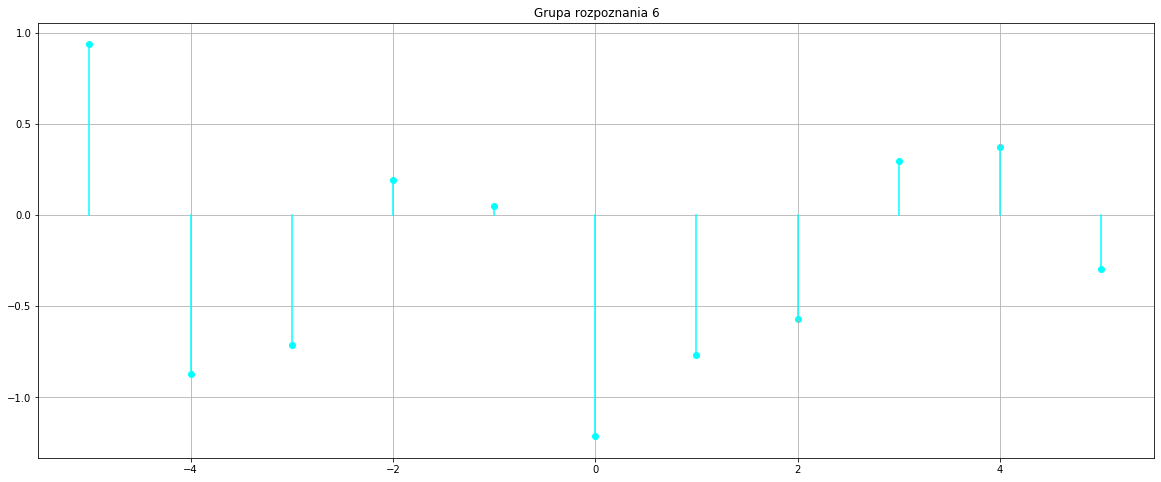

In [87]:
fig = plt.figure(figsize=(20, 8))
for i in range(len(cross_corr)):
    plt.scatter(i-5, pea[i], c='cyan')
    plt.plot([i-5, i-5], [0, pea[i]], 'cyan')
#     plt.scatter(i-5, cross_corr[i], c='green')
#     plt.scatter(i-5, cross_corr1[i], c='red')
#     #plt.scatter(i-5, cross_corr2[i], c='olive')
#     plt.scatter(i-5, cross_corr3[i], c='blue')
#     plt.scatter(i-5, cross_corr4[i], c='orange')
#     plt.scatter(i-5, cross_corr5[i], c='purple')
#     plt.scatter(i-5, cross_corr6[i], c='brown')
#     plt.scatter(i-5, cross_corr8[i], c='pink')
#     plt.scatter(i-5, cross_corr9[i], c='gray')
#     plt.scatter(i-5, cross_corr10[i], c='black')
    
#     plt.plot([i-5, i-5], [0, cross_corr[i]], 'g')
#     plt.plot([i-5, i-5], [0, cross_corr1[i]], 'r')
#     #plt.plot([i-5, i-5], [0, cross_corr2[i]], 'olive')
#     plt.plot([i-5, i-5], [0, cross_corr3[i]], 'b')
#     plt.plot([i-5, i-5], [0, cross_corr4[i]], 'orange')
#     plt.plot([i-5, i-5], [0, cross_corr5[i]], 'purple')
#     plt.plot([i-5, i-5], [0, cross_corr6[i]], 'brown')
#     plt.plot([i-5, i-5], [0, cross_corr8[i]], 'pink')
#     plt.plot([i-5, i-5], [0, cross_corr9[i]], 'gray')
#     plt.plot([i-5, i-5], [0, cross_corr10[i]], 'black')
    
    plt.grid(True)
#     plt.legend(("acorr", "acorr1","acorr2", "acorr3","acorr4","acorr5","acorr6","acorr8","acorr9","acorr10",))
    plt.title("Grupa rozpoznania 6")

### grupa rozpoznania 7

In [88]:
df = pd.read_sql("SELECT * FROM cva_cases \
INNER JOIN lok_gmin ON \
substr(cva_cases.teryt_code,1,7) = lok_gmin.teryt \
INNER JOIN nn_stacje ON lok_gmin.rowid - 1 = nn_stacje.id_gmi \
INNER JOIN stacje ON nn_stacje.id_st1 = stacje.id_st \
INNER JOIN pog_dzienna ON stacje.kod_st = pog_dzienna.kod_st \
AND cva_cases.adm_date = substr(pog_dzienna.pog_timestamp,1,10) \
INNER JOIN pog_dzienna_mala ON stacje.kod_st = pog_dzienna_mala.kod_st \
AND cva_cases.adm_date = substr(pog_dzienna_mala.pog_timestamp,1,10) \
WHERE (cva_cases.teryt_code LIKE '02%' AND dgn_group = 7);" , con=connection)

In [89]:
df2_adm_date = []
df2_cva_filled = []
df2_sr_dob_cisnienie_na_poziomie_stacji = []
i = 0
while i < len(df) - 1:
    j = i
    while df.adm_date[i] == df.adm_date[i + 1]:
        i += 1
    df2_adm_date.append(df.adm_date[i])
    df2_cva_filled.append(sum(df.cva_filled[j:i+1]))
    df2_sr_dob_cisnienie_na_poziomie_stacji.append(df.srednia_dobowe_cisnienie_na_poziomie_stacji[i])
    i += 1

In [90]:
df2 = pd.DataFrame({"adm_date": df2_adm_date, "cva_filled": df2_cva_filled, "srednia_dobowe_cisnienie_na_poziomie_stacji": df2_sr_dob_cisnienie_na_poziomie_stacji})
df2

,adm_date,cva_filled,srednia_dobowe_cisnienie_na_poziomie_stacji
0,2018-01-02,1.0,992.6
1,2018-01-03,1.0,956.8
2,2018-01-07,1.0,1010.3
3,2018-01-08,1.0,1018.4
4,2018-01-11,1.0,1001.9
...,...,...,...
267,2019-12-03,1.0,984.1
268,2019-12-05,1.0,1007.0
269,2019-12-10,2.0,978.4
270,2019-12-13,1.0,947.9


In [91]:
cisn = list(df2.srednia_dobowe_cisnienie_na_poziomie_stacji.values)
cva = list(df2.cva_filled.values)

In [92]:
pea = auto2cov(cisn, cva, [-5, 5])
cross_corr = auto2corr(cisn, cva, [-5, 5])
cross_corr1 = auto2corr1(cisn, cva, [-5, 5], 2.2191)
#cross_corr2 = auto2corr2(cisn, cva, [-5, 5], 0.015)
cross_corr3 = auto2corr3(cisn, cva, [-5, 5])
cross_corr4 = auto2corr4(cisn, cva, [-5, 5])
cross_corr5 = auto2corr5(cisn, cva, [-5, 5])
cross_corr6 = auto2corr6(cisn, cva, [-5, 5])
cross_corr8 = auto2corr8(cisn, cva, [-5, 5])
cross_corr9 = auto2corr9(cisn, cva, [-5, 5])
cross_corr10 = auto2corr10(cisn, cva, [-5, 5])

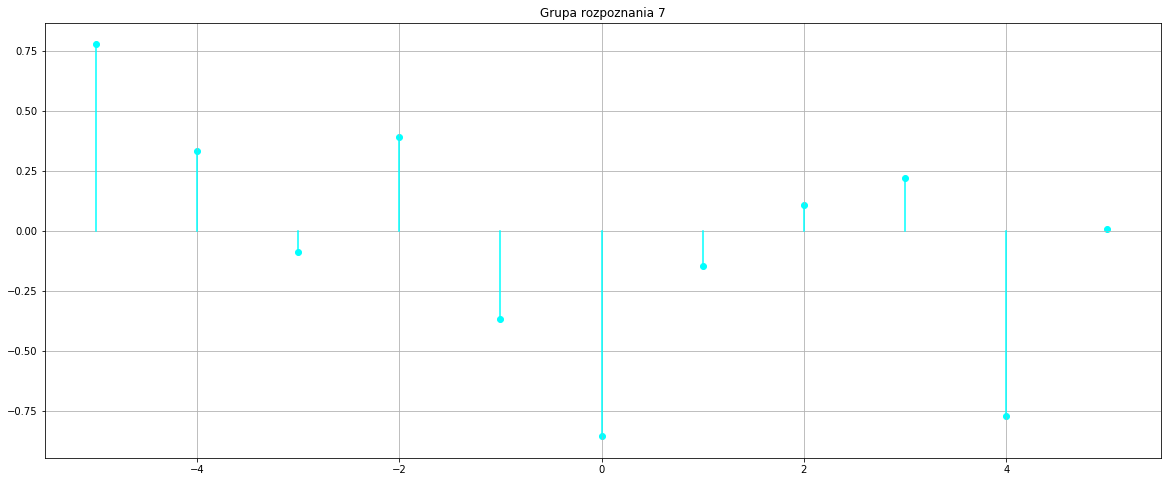

In [93]:
fig = plt.figure(figsize=(20, 8))
for i in range(len(cross_corr)):
    plt.scatter(i-5, pea[i], c='cyan')
    plt.plot([i-5, i-5], [0, pea[i]], 'cyan')
#     plt.scatter(i-5, cross_corr[i], c='green')
#     plt.scatter(i-5, cross_corr1[i], c='red')
#     #plt.scatter(i-5, cross_corr2[i], c='olive')
#     plt.scatter(i-5, cross_corr3[i], c='blue')
#     plt.scatter(i-5, cross_corr4[i], c='orange')
#     plt.scatter(i-5, cross_corr5[i], c='purple')
#     plt.scatter(i-5, cross_corr6[i], c='brown')
#     plt.scatter(i-5, cross_corr8[i], c='pink')
#     plt.scatter(i-5, cross_corr9[i], c='gray')
#     plt.scatter(i-5, cross_corr10[i], c='black')
    
#     plt.plot([i-5, i-5], [0, cross_corr[i]], 'g')
#     plt.plot([i-5, i-5], [0, cross_corr1[i]], 'r')
#     #plt.plot([i-5, i-5], [0, cross_corr2[i]], 'olive')
#     plt.plot([i-5, i-5], [0, cross_corr3[i]], 'b')
#     plt.plot([i-5, i-5], [0, cross_corr4[i]], 'orange')
#     plt.plot([i-5, i-5], [0, cross_corr5[i]], 'purple')
#     plt.plot([i-5, i-5], [0, cross_corr6[i]], 'brown')
#     plt.plot([i-5, i-5], [0, cross_corr8[i]], 'pink')
#     plt.plot([i-5, i-5], [0, cross_corr9[i]], 'gray')
#     plt.plot([i-5, i-5], [0, cross_corr10[i]], 'black')
    
    plt.grid(True)
#     plt.legend(("acorr", "acorr1", "acorr3","acorr4","acorr5","acorr6","acorr8","acorr9","acorr10",))
    plt.title("Grupa rozpoznania 7")

In [94]:
cross_corr4

[0.20209307856974734,
 0.5579164354237683,
 0.6333941171807027,
 0.49322127963213486,
 0.7627844287639697,
 1.0,
 0.6765242210417834,
 0.47165622770158216,
 0.5686989613890446,
 0.748830571632431,
 0.5255688575279639]

In [108]:
connection.close()